# **Predicting Hospital Readmissions for Diabetic Patients Using Machine Learning**




In [1]:
#Import Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [75]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**Load Data from Diabetic Patients Hospital Readmissions Dataset**

In [2]:
# Load the dataset from a CSV file
# df=pd.read_csv('gdrive/My Drive/Data/dataset_diabetes/diabetic_data.csv')
# df.shape
df=pd.read_csv("diabetic_data.csv")
df.shape

(101766, 50)

In [3]:
#summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# # Import the required library
# from prettytable import PrettyTable

# # Initialize the PrettyTable object
# t = PrettyTable(['Column Name', 'Missing Values', 'Missing Percentage'])

# # Loop through each column in the dataset
# for col in df.columns:

#     # Find the number of missing values in each column.
#     # Here, we consider '?' as a missing value
#     lenn = len(df[df[col] == '?'])

#     # Calculate the percentage of missing values in each column
#     missing_percentage = lenn / len(df)

#     # Add the information to the table
#     t.add_row([col, lenn, missing_percentage])

# # Print the table
# print(t)

ModuleNotFoundError: No module named 'prettytable'

In [5]:
# Select rows to drop based on conditions
drop_indices = set(
    df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index
)
drop_indices = drop_indices.union(
    set(df['diag_1'][df['diag_1'] == '?'].index)
)
drop_indices = drop_indices.union(
    set(df['diag_2'][df['diag_2'] == '?'].index)
)
drop_indices = drop_indices.union(
    set(df['diag_3'][df['diag_3'] == '?'].index)
)
drop_indices = drop_indices.union(
    set(df['race'][df['race'] == '?'].index)
)
drop_indices = drop_indices.union(
    set(df['gender'][df['gender'] == 'Unknown/Invalid'].index)
)

# Drop the selected rows
df = df.drop(drop_indices)

In [6]:
print(len(df))

98052


In [7]:
# Drop rows with NaN values from df
df.dropna(inplace = True)
# Print the total number of rows in df
print('Total data = ', len(df))
# Import numpy library for using its unique function
import numpy as np
# Print the total number of unique 'patient_nbr' in df
print('Unique entries = ', len(np.unique(df['patient_nbr'])))
# Remove duplicates based on 'patient_nbr' and keep the first occurrence
df.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)
# Print the total number of rows in df after removing duplicates
print('Length after removing Duplicates:', len(df))

Total data =  98052
Unique entries =  68629
Length after removing Duplicates: 68629


In [8]:
#Display data
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,443842016,183087545,Caucasian,Female,[70-80),?,1,1,7,9,...,No,Steady,No,No,No,No,No,Ch,Yes,>30
101755,443842022,188574944,Other,Female,[40-50),?,1,1,7,14,...,No,Up,No,No,No,No,No,Ch,Yes,>30
101756,443842070,140199494,Other,Female,[60-70),?,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30
101758,443842340,120975314,Caucasian,Female,[80-90),?,1,1,7,5,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [9]:
import pandas as pd

# # 3. Filter by Length of Stay
df = df[(df['time_in_hospital'] >= 1) & (df['time_in_hospital'] <= 14)]

# # 4. Ensure Laboratory Tests were performed
df = df[df['num_lab_procedures'] > 0]

# # 5. Ensure Medications were administered
df = df[df['num_medications'] > 0]

# Check the number of remaining encounters
print(len(df))  # This should print 8,756 if the data and criteria match your description.


68629


In [10]:
def safe_float_conversion(val):
    try:
        return float(val)
    except ValueError:  # if conversion fails
        return None  # or np.nan if you imported numpy

df['diag_1'] = df['diag_1'].map(safe_float_conversion)

In [11]:
df =df[df['diag_1'].between(250.00, 250.99)]
print(len(df))

5188


In [12]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
10,28236,89869032,AfricanAmerican,Female,[40-50),?,1,1,7,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
52,590346,37746639,AfricanAmerican,Female,[40-50),?,1,6,7,8,...,No,Steady,No,No,No,No,No,No,Yes,>30
56,630342,93232917,AfricanAmerican,Female,[50-60),?,3,6,2,9,...,No,Steady,No,No,No,No,No,No,Yes,>30
60,676422,63754317,AfricanAmerican,Female,[70-80),?,1,1,7,4,...,No,Steady,No,No,No,No,No,No,Yes,>30
89,1157574,91181331,Caucasian,Male,[40-50),?,3,1,2,4,...,No,No,No,No,No,No,No,No,No,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101693,443139440,49520538,Caucasian,Female,[30-40),?,1,1,7,2,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101703,443191964,125535857,Caucasian,Male,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101713,443222096,160248038,Caucasian,Male,[40-50),?,1,1,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101731,443724206,124767527,Caucasian,Male,[50-60),?,1,1,7,4,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [13]:
# Import the necessary library
import pandas as pd

# Assuming that 'df' is your DataFrame

# Loop through each column in the DataFrame
for c in list(df.columns):

    # Get a list of unique values for the current column
    n = df[c].unique()

    # If the number of unique values is less than 30, print the values.
    # Otherwise, print the number of unique values
    if len(n) < 30:
        print(f"{c}:")  # print the column name
        print(n)  # print the unique values
    else:
        print(f"{c}: {len(n)} unique values")  # print the column name and number of unique values

encounter_id: 5188 unique values
patient_nbr: 5188 unique values
race:
['AfricanAmerican' 'Caucasian' 'Other' 'Hispanic' 'Asian']
gender:
['Female' 'Male']
age:
['[40-50)' '[50-60)' '[70-80)' '[30-40)' '[20-30)' '[90-100)' '[60-70)'
 '[80-90)' '[10-20)' '[0-10)']
weight:
['?' '[0-25)' '[75-100)' '[50-75)' '[100-125)' '[125-150)' '[25-50)'
 '[175-200)']
admission_type_id:
[1 3 6 2 5 4 8]
discharge_disposition_id:
[ 1  6 25  2  5  3 11  7  8  4 14 18 23 22 17 28 13 15 27]
admission_source_id:
[ 7  2  1  4 20 17  5  3  6  9  8]
time_in_hospital:
[ 9  8  4  5 11  1  7  2 10  6  3 12 14 13]
payer_code:
['?' 'MC' 'BC' 'UN' 'MD' 'HM' 'SP' 'CP' 'PO' 'CM' 'DM' 'OG' 'WC' 'OT' 'SI'
 'CH' 'MP']
medical_specialty: 44 unique values
num_lab_procedures: 103 unique values
num_procedures:
[2 1 3 5 0 6 4]
num_medications: 50 unique values
number_outpatient:
[ 0  1  3  4  5  2 20  6  8 10  7  9 13 14 15 11 16 17]
number_emergency:
[ 0  1  4  2  7  3  6 42  8  5]
number_inpatient:
[ 0  1  2  3  4  5  7  9 

In [14]:
counts = df['readmitted'].value_counts()
print(counts)

NO     2883
>30    1811
<30     494
Name: readmitted, dtype: int64


**2.Handling Missing Values in the Diabetes Hospital Readmission Datase**

In [15]:
# Drop columns
columns_to_drop = [ 'encounter_id', 'patient_nbr','payer_code',
    'chlorpropamide', 'acetohexamide', 'tolbutamide',
    'miglitol', 'troglitazone', 'tolazamide', 'examide',
    'citoglipton', 'glipizide-metformin', 'glimepiride-pioglitazone',
    'metformin-rosiglitazone', 'metformin-pioglitazone',
    'diag_2', 'diag_3', 'weight', 'medical_specialty'
]

df.drop(columns=columns_to_drop, inplace=True)

In [16]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted
10,AfricanAmerican,Female,[40-50),1,1,7,9,47,2,17,...,No,No,No,No,No,Steady,No,No,Yes,>30
52,AfricanAmerican,Female,[40-50),1,6,7,8,55,2,17,...,No,No,No,No,No,Steady,No,No,Yes,>30
56,AfricanAmerican,Female,[50-60),3,6,2,9,37,2,19,...,No,No,No,No,No,Steady,No,No,Yes,>30
60,AfricanAmerican,Female,[70-80),1,1,7,4,48,2,15,...,No,No,No,No,No,Steady,No,No,Yes,>30
89,Caucasian,Male,[40-50),3,1,2,4,38,1,17,...,No,No,No,No,No,No,No,No,No,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101693,Caucasian,Female,[30-40),1,1,7,2,67,0,9,...,No,No,No,No,No,Down,No,Ch,Yes,NO
101703,Caucasian,Male,[10-20),1,1,7,3,44,0,10,...,No,No,No,No,No,Up,No,Ch,Yes,NO
101713,Caucasian,Male,[40-50),1,1,7,3,62,0,14,...,No,No,No,No,No,Down,No,Ch,Yes,NO
101731,Caucasian,Male,[50-60),1,1,7,4,29,0,16,...,No,No,No,No,No,Up,No,Ch,Yes,NO


Printing Unique Values in Each Column of a DataFrame

**4.Drop irrelevant variables**

**5. Removal of Deceased or Hospice-Associated Patient Samples**

In [17]:
df = df.loc[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

In [18]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted
10,AfricanAmerican,Female,[40-50),1,1,7,9,47,2,17,...,No,No,No,No,No,Steady,No,No,Yes,>30
52,AfricanAmerican,Female,[40-50),1,6,7,8,55,2,17,...,No,No,No,No,No,Steady,No,No,Yes,>30
56,AfricanAmerican,Female,[50-60),3,6,2,9,37,2,19,...,No,No,No,No,No,Steady,No,No,Yes,>30
60,AfricanAmerican,Female,[70-80),1,1,7,4,48,2,15,...,No,No,No,No,No,Steady,No,No,Yes,>30
89,Caucasian,Male,[40-50),3,1,2,4,38,1,17,...,No,No,No,No,No,No,No,No,No,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101693,Caucasian,Female,[30-40),1,1,7,2,67,0,9,...,No,No,No,No,No,Down,No,Ch,Yes,NO
101703,Caucasian,Male,[10-20),1,1,7,3,44,0,10,...,No,No,No,No,No,Up,No,Ch,Yes,NO
101713,Caucasian,Male,[40-50),1,1,7,3,62,0,14,...,No,No,No,No,No,Down,No,Ch,Yes,NO
101731,Caucasian,Male,[50-60),1,1,7,4,29,0,16,...,No,No,No,No,No,Up,No,Ch,Yes,NO


# **Feature Transformation and Categorization**

**1.Age Feature**


The values of age are given like [0-10),[10-20),[20-30) The age feature is not categorical but ordinal and hence we should convert it to numbers and treat it as numeric feature. We are converting age feature like below,
[0-10) --> 1
[10-20) --> 2
[20-30) ---> 3

In [19]:
# Print unique values in 'age' column
print(np.unique(df['age']))

# Define a dictionary for age range replacements
replaceDict = {
    '[0-10)' : 5,
    '[10-20)' : 15,
    '[20-30)' : 25,
    '[30-40)' : 35,
    '[40-50)' : 45,
    '[50-60)' : 55,
    '[60-70)' : 65,
    '[70-80)' : 75,
    '[80-90)' : 85,
    '[90-100)' : 95
}

# Replace age ranges with the mean value of each range using the replaceDict
df['age'] = df['age'].apply(lambda x : replaceDict[x])

# Print the first 5 rows of the 'age' column after the transformation
print(df['age'].head())

['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
10    45
52    45
56    55
60    75
89    45
Name: age, dtype: int64


C:\Users\faysa\AppData\Local\Temp\ipykernel_4756\1117029342.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = df['age'].apply(lambda x : replaceDict[x])


**2.Discharge Disposiiton ID Feature**

Discharge Disposition ID corresponding to [11 or 13 or 14 or 19 or 20 or 21] indicates patient has expired so there is no chance that it will readmit again so we will remove these records.

Discharge Disposition ID has lots of distinct values using domain knowledge we will convert them into small number of categories.
ddi_cat1 = [6, 8, 9, 13]
ddi_cat2 = [3, 4, 5, 14, 22, 23, 24]
ddi_cat10 = [12, 15, 16, 17]
ddi_cat11 = [19, 20, 21]
ddi_cat18 = [25, 26]

In [21]:
# Reclassify 'discharge_disposition_id'
df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9, 13]
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 11 if int(x) in [19, 20, 21]
                                                                           else ( 18 if int(x) in [25, 26]
                                                                           else int(x) )))))

# Filter out rows with certain 'discharge_disposition_id' values
df = df[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

**3.Admission Type ID Feature**


Similarly Admission Type ID can be converted into small number of categories
ati_cat1 = [2, 7]
ati_cat5 = [6, 8]

In [22]:
# Reclassify 'admission_type_id'
df['admission_type_id'] = df['admission_type_id'].apply(lambda x : 1 if int(x) in [2, 7]
                                                        else ( 5 if int(x) in [6, 8]
                                                        else int(x) ))

**4.Admission Source ID Feature**

Similarly Admission Source ID can be converted into small number of categories
asi_cat1 = [2, 3]
ati_cat4 = [5, 6, 10, 22, 25]
ati_cat9 = [15, 17, 20, 21]
ati_cat11 = [13, 17]

In [23]:
# admission_source_id'
df['admission_source_id'] = df['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))


In [24]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted
10,AfricanAmerican,Female,45,1,1,7,9,47,2,17,...,No,No,No,No,No,Steady,No,No,Yes,>30
52,AfricanAmerican,Female,45,1,1,7,8,55,2,17,...,No,No,No,No,No,Steady,No,No,Yes,>30
56,AfricanAmerican,Female,55,3,1,1,9,37,2,19,...,No,No,No,No,No,Steady,No,No,Yes,>30
60,AfricanAmerican,Female,75,1,1,7,4,48,2,15,...,No,No,No,No,No,Steady,No,No,Yes,>30
89,Caucasian,Male,45,3,1,1,4,38,1,17,...,No,No,No,No,No,No,No,No,No,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101693,Caucasian,Female,35,1,1,7,2,67,0,9,...,No,No,No,No,No,Down,No,Ch,Yes,NO
101703,Caucasian,Male,15,1,1,7,3,44,0,10,...,No,No,No,No,No,Up,No,Ch,Yes,NO
101713,Caucasian,Male,45,1,1,7,3,62,0,14,...,No,No,No,No,No,Down,No,Ch,Yes,NO
101731,Caucasian,Male,55,1,1,7,4,29,0,16,...,No,No,No,No,No,Up,No,Ch,Yes,NO


# **Addressing High Skewness and Kurtosis in Numerical Features via Data Transformation**

- Setting up the columns and data structures: The code first specifies the
numerical columns to focus on. It then initializes a dataframe (statdataframe) and lists to store various statistics for each numerical column.

- Calculating skewness, kurtosis, and standard deviation: For each numerical column, it calculates the skewness, kurtosis, and standard deviation before any transformations. These values are stored in their respective lists.

- Deciding on the need for transformation: If the absolute values of both skewness and kurtosis are greater than 2, it means the data in the column are heavily skewed or have heavy tails, so a transformation might be needed to make it more normally distributed.

- Applying transformations: Depending on the proportion of zero values in the column, one of two transformations is applied:

 If less than 2% of the column's values are zero, a log transformation is applied (np.log). Log transformation can't handle zero values, so only rows where the column value is greater than zero are considered.

 If more than 2% of the column's values are zero, a log1p transformation is applied (np.log1p). Log1p transformation can handle zero values as it adds 1 to the input before taking the log.

 After transformation, the skewness, kurtosis, and standard deviation are recalculated.

- Handling columns that don't need transformation: If the absolute values of both skewness and kurtosis are not greater than 2, then the column doesn't need transformation. The 'after' statistics remain the same as the 'before' statistics.

- Recording all the statistics: All the 'before' and 'after' statistics, along with whether a transformation was needed and which type was used, are added to statdataframe for each column.

- Printing the statdataframe: The dataframe is then printed, allowing you to see all the statistics and transformation details for each numerical column.

In short, this code helps to identify columns in the dataframe with skewed distributions or high kurtosis, and applies suitable transformations to make them more normally distributed. This is an important step in many machine learning pipelines, as many algorithms assume that the input data are normally distributed.


In [25]:
# Define the list of numerical columns
num_col = ['age', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
           'num_medications', 'number_outpatient', 'number_emergency',
           'number_inpatient', 'number_diagnoses']
# , 'patient_service', 'med_change', 'num_med'
# Initialize a new DataFrame to store statistics
statdataframe = pd.DataFrame()

# Add the column names to the DataFrame
statdataframe['numeric_column'] = num_col

# Initialize lists to store the statistics
skew_before = []
skew_after = []
kurt_before = []
kurt_after = []
standard_deviation_before = []
standard_deviation_after = []
log_transform_needed = []
log_type = []

# For each column in the list of numerical columns
for i in num_col:
    # Compute skewness before transformation
    skewval = df[i].skew()
    skew_before.append(skewval)

    # Compute kurtosis before transformation
    kurtval = df[i].kurtosis()
    kurt_before.append(kurtval)

    # Compute standard deviation before transformation
    sdval = df[i].std()
    standard_deviation_before.append(sdval)

    # If skewness and kurtosis are high, transformation is needed
    if (abs(skewval) >2) & (abs(kurtval) >2):
        log_transform_needed.append('Yes')

        # If the proportion of 0 values is less than 2%, apply log transformation
        if len(df[df[i] == 0])/len(df) <=0.02:
            log_type.append('log')
            skewvalnew = np.log(pd.DataFrame(df[df[i] > 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log(pd.DataFrame(df[df[i] > 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log(pd.DataFrame(df[df[i] > 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

        # If the proportion of 0 values is more than 2%, apply log1p transformation
        else:
            log_type.append('log1p')
            skewvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).skew()
            skew_after.append(skewvalnew)

            kurtvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).kurtosis()
            kurt_after.append(kurtvalnew)

            sdvalnew = np.log1p(pd.DataFrame(df[df[i] >= 0])[i]).std()
            standard_deviation_after.append(sdvalnew)

    # If skewness and kurtosis are not high, no transformation is needed
    else:
        log_type.append('NA')
        log_transform_needed.append('No')

        skew_after.append(skewval)
        kurt_after.append(kurtval)
        standard_deviation_after.append(sdval)

# Add all the computed statistics to the DataFrame
statdataframe['skew_before'] = skew_before
statdataframe['kurtosis_before'] = kurt_before
statdataframe['standard_deviation_before'] = standard_deviation_before
statdataframe['log_transform_needed'] = log_transform_needed
statdataframe['log_type'] = log_type
statdataframe['skew_after'] = skew_after
statdataframe['kurtosis_after'] = kurt_after
statdataframe['standard_deviation_after'] = standard_deviation_after

# Print the DataFrame
statdataframe

,numeric_column,skew_before,kurtosis_before,standard_deviation_before,log_transform_needed,log_type,skew_after,kurtosis_after,standard_deviation_after
0,age,-0.292334,-0.526625,19.853527,No,NA,-0.292334,-0.526625,19.853527
1,time_in_hospital,1.199277,0.916562,3.045186,No,NA,1.199277,0.916562,3.045186
2,num_lab_procedures,-0.269082,-0.156755,19.819749,No,NA,-0.269082,-0.156755,19.819749
3,num_procedures,1.781300,2.855101,1.383195,No,NA,1.781300,2.855101,1.383195
4,num_medications,1.071590,1.680301,7.445111,No,NA,1.071590,1.680301,7.445111
5,number_outpatient,7.361982,75.420773,1.194440,Yes,log1p,3.460280,12.810467,0.393675
6,number_emergency,27.523638,1305.223481,0.824084,Yes,log1p,3.634746,16.283470,0.288563
7,number_inpatient,5.697494,46.780928,0.737480,Yes,log1p,3.050054,9.744581,0.331118
8,number_diagnoses,-0.382227,-1.188662,2.120110,No,NA,-0.382227,-1.188662,2.120110


# **Handling Zeros in Data Transformation: Choosing between Log and Log1p for Outlier Mitigation**

- Computing log(x) for any feature x if percentage of 0s in x ≤ 2%, after removing the zeros, which ensures that We don’t bulk-remove records that hold predictive power for other columns
- Compute log1p(x) otherwise (log1p(x) means log(x+1), while retaining the zeros

In summary, when the percentage of zeros in a feature is low (≤ 2%), removing the zeros and using log transformation is appropriate. When the percentage of zeros is higher (> 2%), using log1p transformation allows for handling zeros correctly without bulk-removing records that might hold predictive power for other columns.

In [26]:
# If the log transform is needed according to our stats dataframe, apply the transformation
for i in range(len(statdataframe)):
    if statdataframe['log_transform_needed'][i] == 'Yes':
        # Get the column name
        colname = str(statdataframe['numeric_column'][i])

        # Apply the appropriate log transformation
        if statdataframe['log_type'][i] == 'log':
            df = df[df[colname] > 0]
            df[colname + "_log"] = np.log(df[colname])

        elif statdataframe['log_type'][i] == 'log1p':
            df = df[df[colname] >= 0]
            df[colname + "_log1p"] = np.log1p(df[colname])

# Drop some of the original columns that are not needed anymore
df = df.drop(['number_outpatient', 'number_inpatient', 'number_emergency'], axis = 1)

print(df.shape)
df.head()

(5131, 31)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
10,AfricanAmerican,Female,45,1,1,7,9,47,2,17,...,No,No,Steady,No,No,Yes,>30,0.0,0.000000,0.000000
52,AfricanAmerican,Female,45,1,1,7,8,55,2,17,...,No,No,Steady,No,No,Yes,>30,0.0,0.000000,0.000000
56,AfricanAmerican,Female,55,3,1,1,9,37,2,19,...,No,No,Steady,No,No,Yes,>30,0.0,0.000000,0.693147
60,AfricanAmerican,Female,75,1,1,7,4,48,2,15,...,No,No,Steady,No,No,Yes,>30,0.0,0.693147,0.000000
89,Caucasian,Male,45,3,1,1,4,38,1,17,...,No,No,No,No,No,No,>30,0.0,0.000000,0.693147


# **Identifying and Removing Outliers: Trimming Data within 3 Standard Deviations from the Mean**

- Anything within 3 Standard Deviations on either side of the mean would include 99.7% of our data and the remaining 0.3% we treat as outliers
- Using this logic, We restricted the data to within 3 Standard deviations on either side from the mean for each numeric column

The statement suggests that in a normal distribution, approximately 99.7% of the data falls within three standard deviations of the mean, leaving around 0.3% as potential outliers that lie beyond this range. Based on this logic, the code provided in the previous example restricts the data to be within three standard deviations on either side of the mean for each numeric column, effectively removing the potential outliers

In [27]:
# Import the necessary library
import scipy as sp

# Select the numeric columns
num_cols = ['age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_diagnoses']

# Keep only the rows in the dataframe that have a z-score less than 3 (i.e., remove outliers that are 3 standard deviations away from the mean)
df = df[(np.abs(sp.stats.zscore(df[num_cols])) < 3).all(axis=1)]

# Print the updated shape and head of the dataframe
print(df.shape)
df.head()

(4937, 31)


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
10,AfricanAmerican,Female,45,1,1,7,9,47,2,17,...,No,No,Steady,No,No,Yes,>30,0.0,0.000000,0.000000
52,AfricanAmerican,Female,45,1,1,7,8,55,2,17,...,No,No,Steady,No,No,Yes,>30,0.0,0.000000,0.000000
56,AfricanAmerican,Female,55,3,1,1,9,37,2,19,...,No,No,Steady,No,No,Yes,>30,0.0,0.000000,0.693147
60,AfricanAmerican,Female,75,1,1,7,4,48,2,15,...,No,No,Steady,No,No,Yes,>30,0.0,0.693147,0.000000
89,Caucasian,Male,45,3,1,1,4,38,1,17,...,No,No,No,No,No,No,>30,0.0,0.000000,0.693147


# **Exploratory Data Analysis (EDA)**


**Target Variable is Readmitted**

It might be interested in predicting whether a patient will be readmitted within 30 days or not. In that case, I can convert '<30' to 1 (meaning readmitted within 30 days), and '>30' and 'No' to 0 (meaning not readmitted within 30 days)

In [28]:
# Convert 'readmitted' to binary
df['readmitted'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)


**1.Target Variable Visualization**

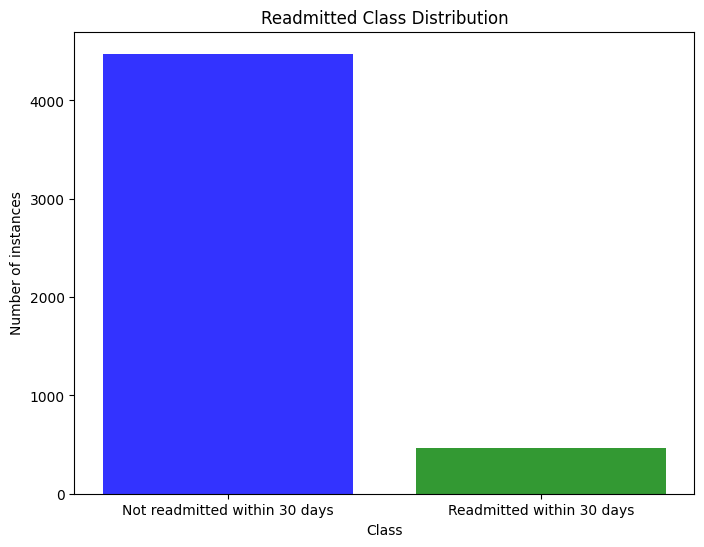

In [29]:
import matplotlib.pyplot as plt

# Count the number of instances for each class
class_counts = df['readmitted'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, alpha=0.8, color=['blue', 'green'])
plt.title('Readmitted Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of instances')
plt.xticks([0,1], ['Not readmitted within 30 days', 'Readmitted within 30 days'])

plt.show()


**2. Histogram Visualization Numerical column**

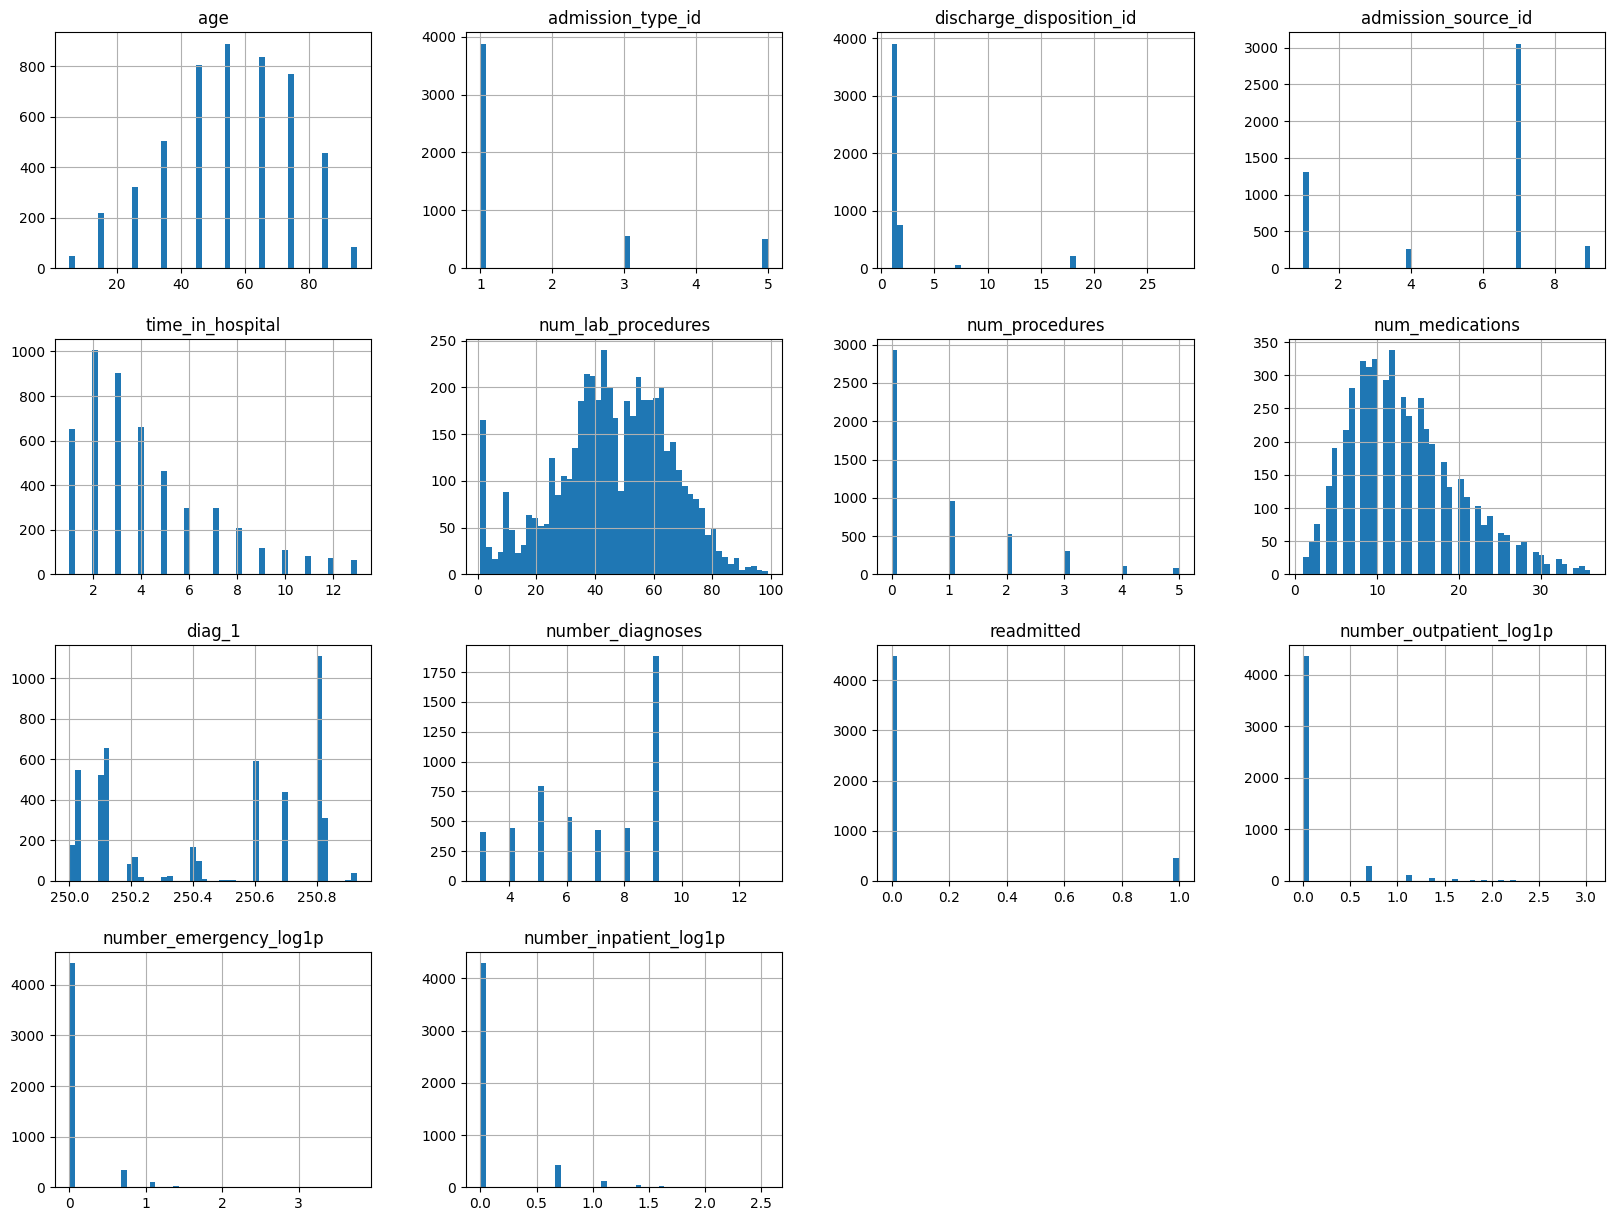

In [30]:
#Display histograms for each column of the dataframe.
df.hist(bins=50, figsize=(20,15))
plt.show()

**3.Distribution of Time in Hospital by Readmission Status**

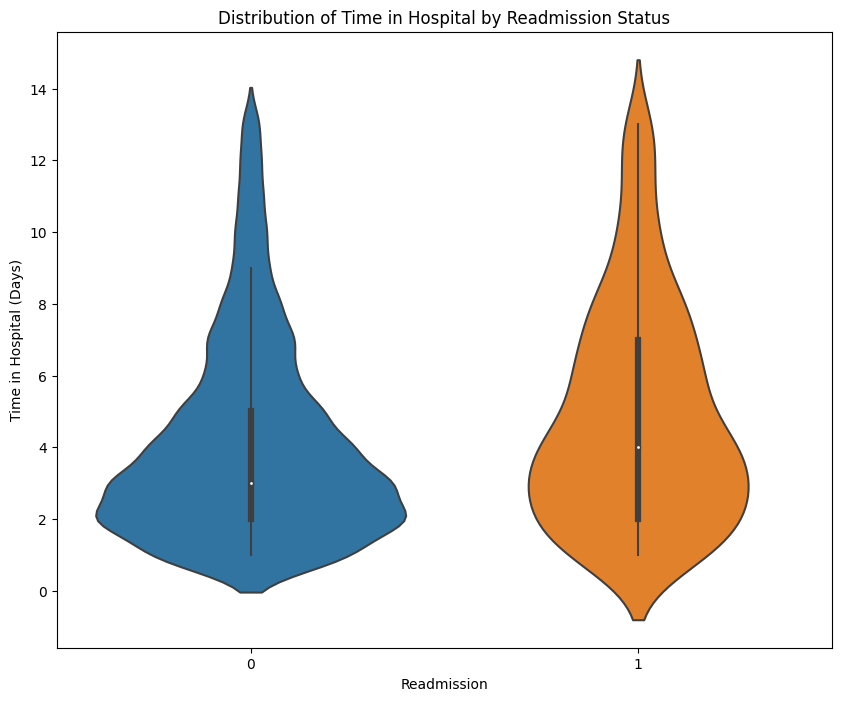

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.violinplot(x='readmitted', y='time_in_hospital', data=df)
plt.title('Distribution of Time in Hospital by Readmission Status')
plt.xlabel('Readmission')
plt.ylabel('Time in Hospital (Days)')
plt.show()

**4.Readmission Counts by Age Group**



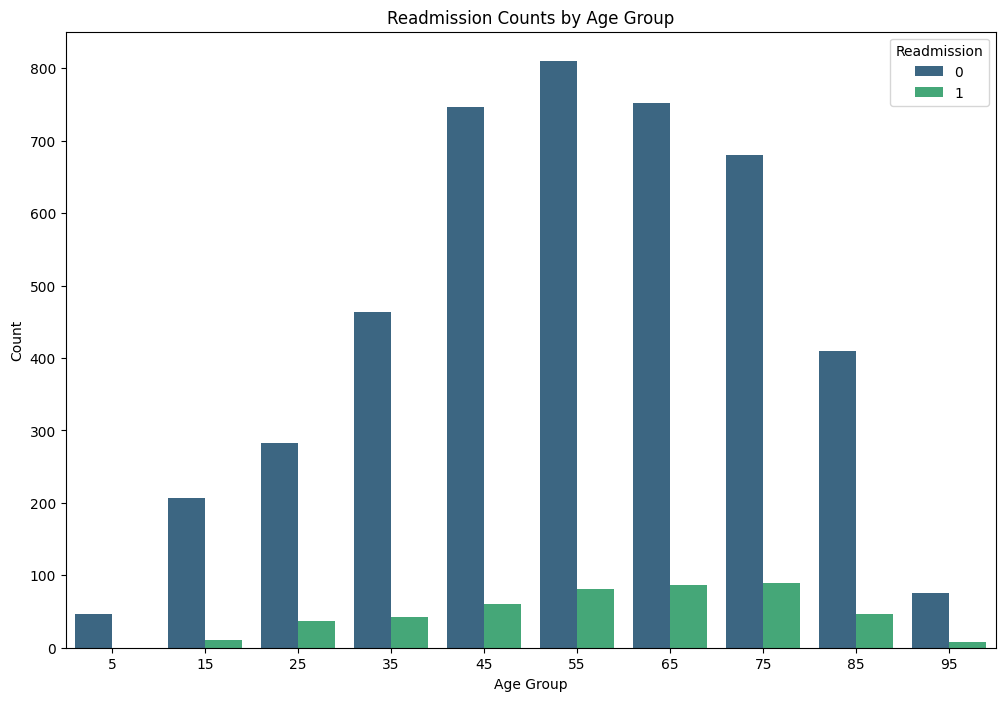

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(x='age', hue='readmitted', data=df, palette='viridis', order=sorted(df['age'].unique()))
plt.title('Readmission Counts by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Readmission', loc='upper right')
plt.show()


**5.Distribution of Number of Medications by Readmission Status**

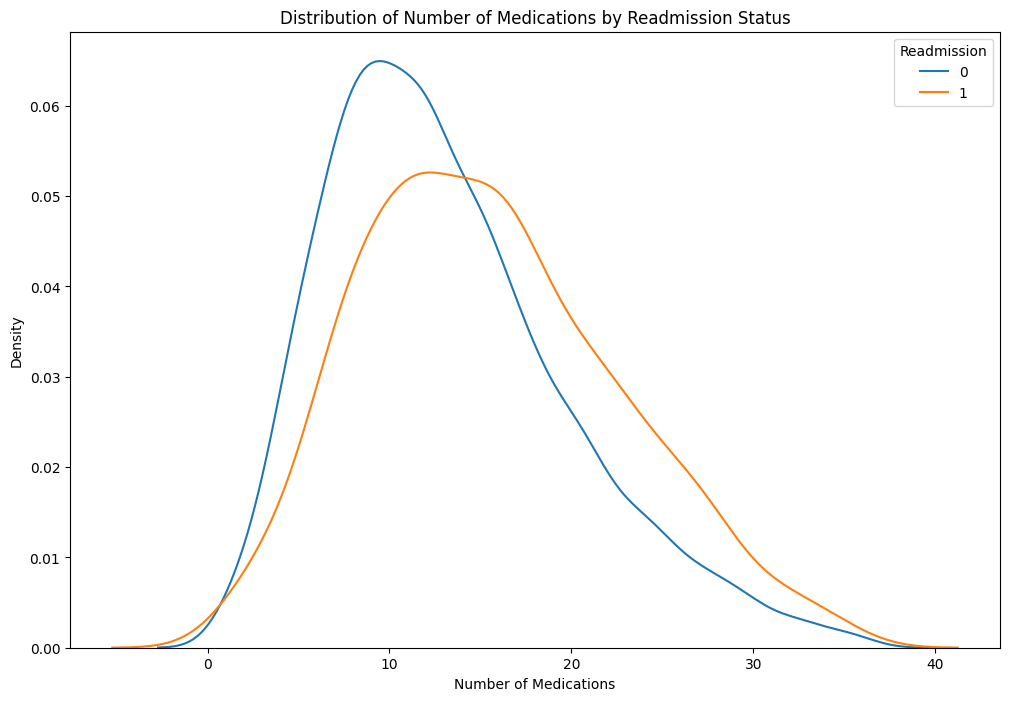

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for readmission_status in df['readmitted'].unique():
    sns.kdeplot(df[df['readmitted'] == readmission_status]['num_medications'],
                label=readmission_status)

plt.title('Distribution of Number of Medications by Readmission Status')
plt.xlabel('Number of Medications')
plt.ylabel('Density')
plt.legend(title='Readmission')
plt.show()

**6.Readmission count by Discharge Disposition**

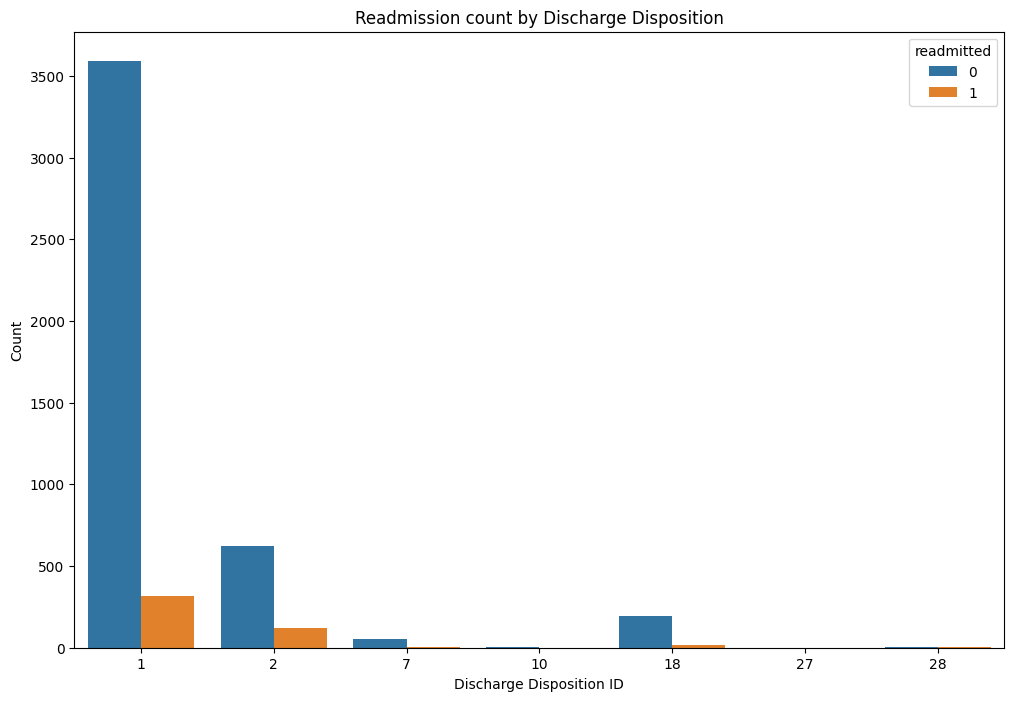

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named as df
plt.figure(figsize=(12,8))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=df)
plt.title('Readmission count by Discharge Disposition')
plt.xlabel('Discharge Disposition ID')
plt.ylabel('Count')
plt.show()

**7.Readmission Counts by Number of Procedures**

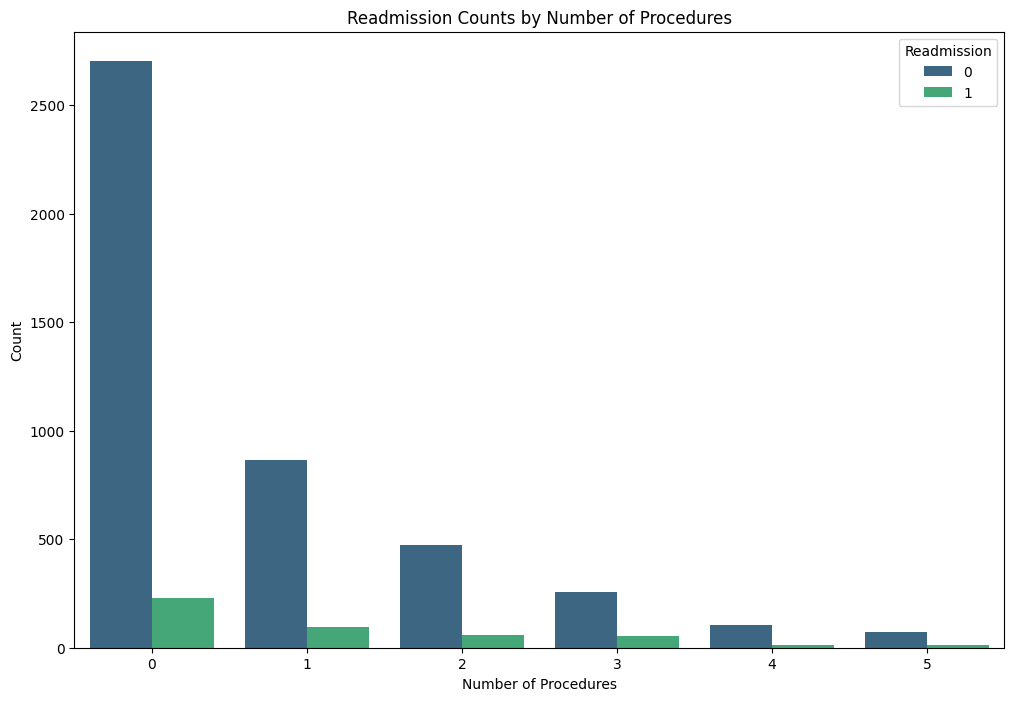

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(x='num_procedures', hue='readmitted', data=df, palette='viridis')
plt.title('Readmission Counts by Number of Procedures')
plt.xlabel('Number of Procedures')
plt.ylabel('Count')
plt.legend(title='Readmission', loc='upper right')
plt.show()

**9.Distribution of Number of Medications by Readmission Status**

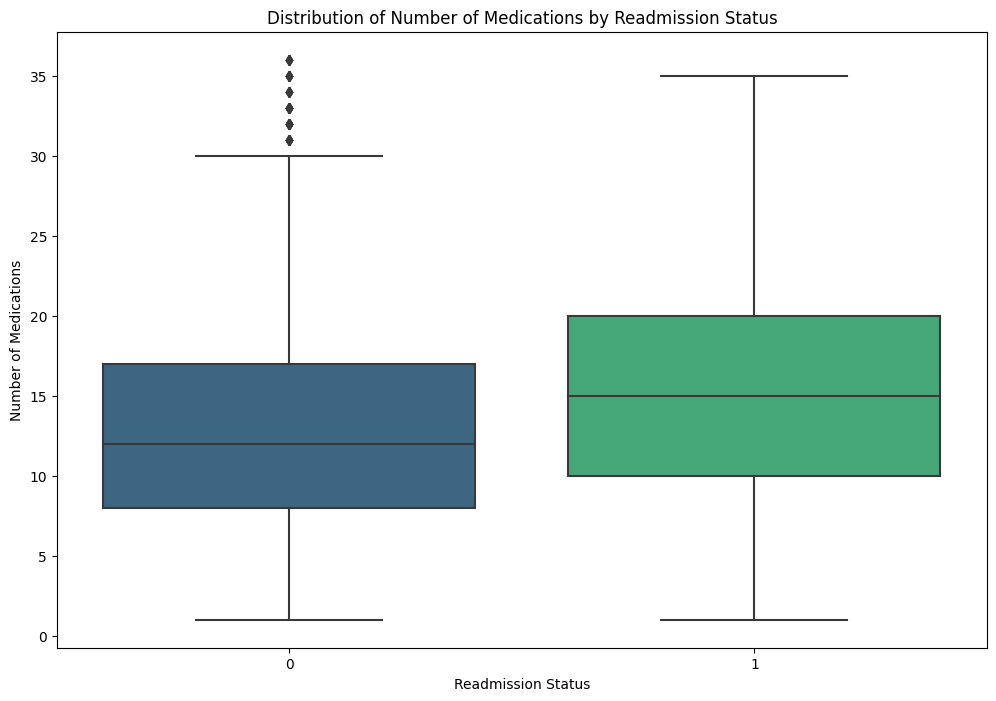

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='readmitted', y='num_medications', data=df, palette='viridis')
plt.title('Distribution of Number of Medications by Readmission Status')
plt.xlabel('Readmission Status')
plt.ylabel('Number of Medications')
plt.show()

**10.Distribution of Number of Diagnoses by Readmission Status**

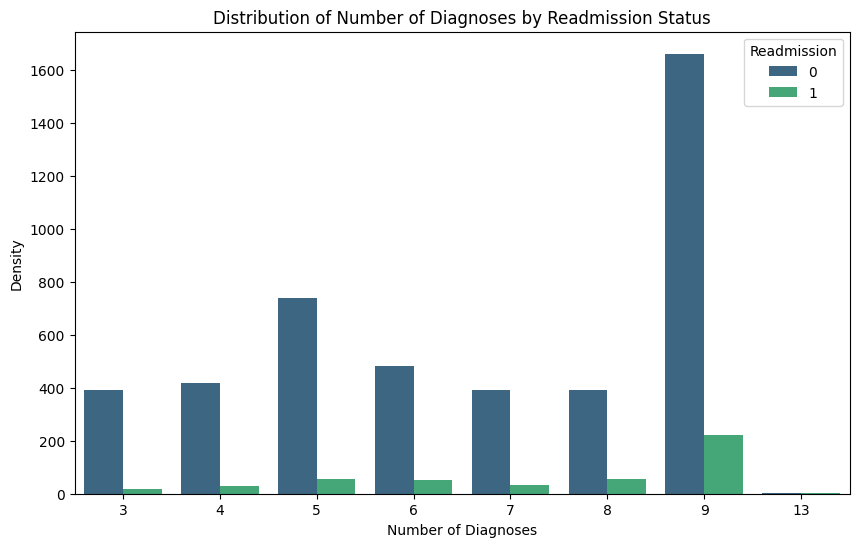

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 6))
sns.countplot(x='number_diagnoses', hue='readmitted', data=df, palette='viridis')
plt.title('Distribution of Number of Diagnoses by Readmission Status')
plt.xlabel('Number of Diagnoses')
plt.ylabel('Density')
plt.legend(title='Readmission')
plt.show()



**11.Readmission Counts by Change in Diabetic Medications**

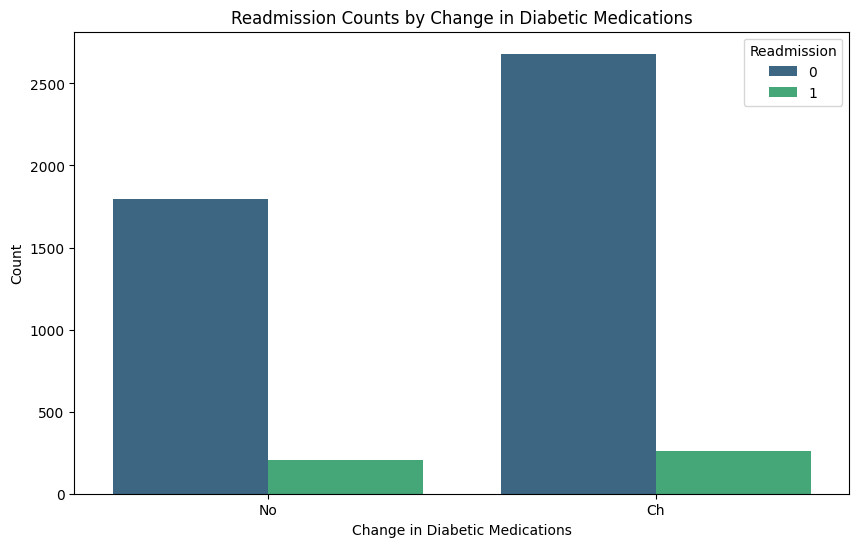

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='change', hue='readmitted', data=df, palette='viridis')
plt.title('Readmission Counts by Change in Diabetic Medications')
plt.xlabel('Change in Diabetic Medications')
plt.ylabel('Count')
plt.legend(title='Readmission', loc='upper right')
plt.show()

**13.Readmission Counts by Admission Source ID**

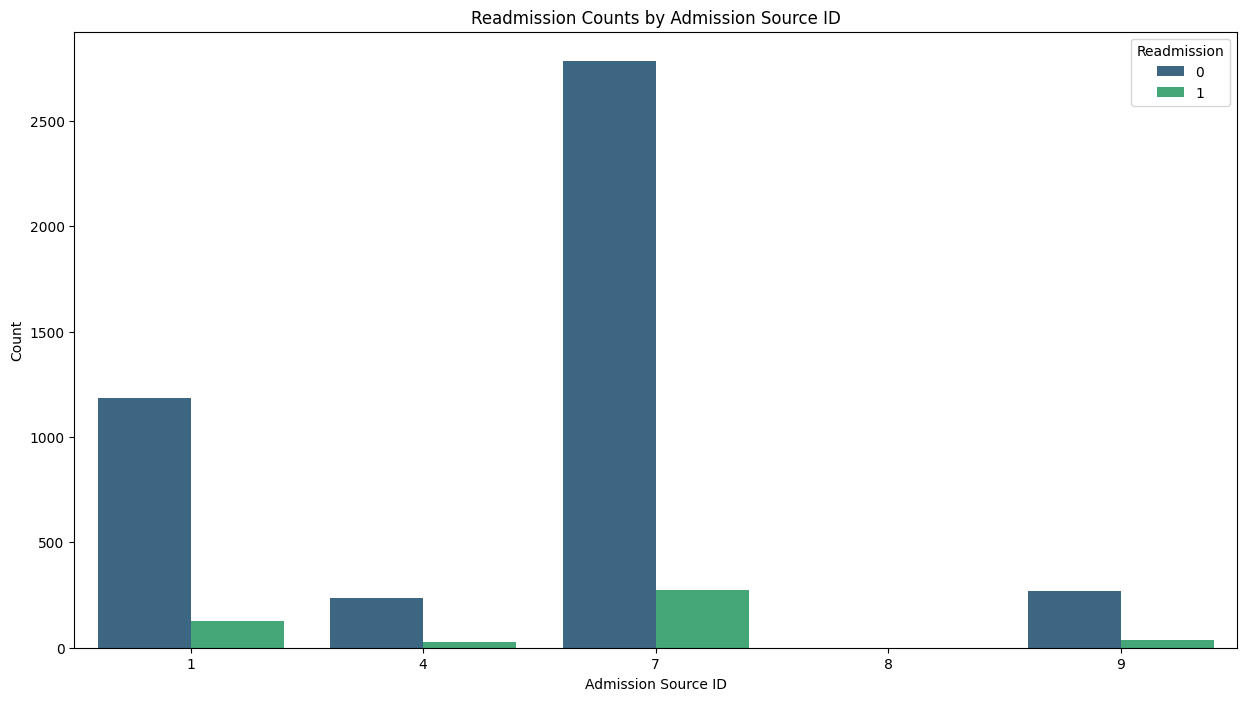

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.countplot(x='admission_source_id', hue='readmitted', data=df, palette='viridis')
plt.title('Readmission Counts by Admission Source ID')
plt.xlabel('Admission Source ID')
plt.ylabel('Count')
plt.legend(title='Readmission', loc='upper right')
plt.show()


In [39]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,rosiglitazone,acarbose,insulin,glyburide-metformin,change,diabetesMed,readmitted,number_outpatient_log1p,number_emergency_log1p,number_inpatient_log1p
10,AfricanAmerican,Female,45,1,1,7,9,47,2,17,...,No,No,Steady,No,No,Yes,0,0.0,0.000000,0.000000
52,AfricanAmerican,Female,45,1,1,7,8,55,2,17,...,No,No,Steady,No,No,Yes,0,0.0,0.000000,0.000000
56,AfricanAmerican,Female,55,3,1,1,9,37,2,19,...,No,No,Steady,No,No,Yes,0,0.0,0.000000,0.693147
60,AfricanAmerican,Female,75,1,1,7,4,48,2,15,...,No,No,Steady,No,No,Yes,0,0.0,0.693147,0.000000
89,Caucasian,Male,45,3,1,1,4,38,1,17,...,No,No,No,No,No,No,0,0.0,0.000000,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101693,Caucasian,Female,35,1,1,7,2,67,0,9,...,No,No,Down,No,Ch,Yes,0,0.0,0.000000,0.000000
101703,Caucasian,Male,15,1,1,7,3,44,0,10,...,No,No,Up,No,Ch,Yes,0,0.0,0.000000,0.000000
101713,Caucasian,Male,45,1,1,7,3,62,0,14,...,No,No,Down,No,Ch,Yes,0,0.0,0.000000,0.000000
101731,Caucasian,Male,55,1,1,7,4,29,0,16,...,No,No,Up,No,Ch,Yes,0,0.0,0.000000,0.000000


In [40]:
df_copy = df.copy()


# **Apply Phi_k (ϕk) correlation**

In [41]:
!pip install phik

interval columns not set, guessing: ['age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1', 'number_diagnoses', 'readmitted', 'number_outpatient_log1p', 'number_emergency_log1p', 'number_inpatient_log1p']


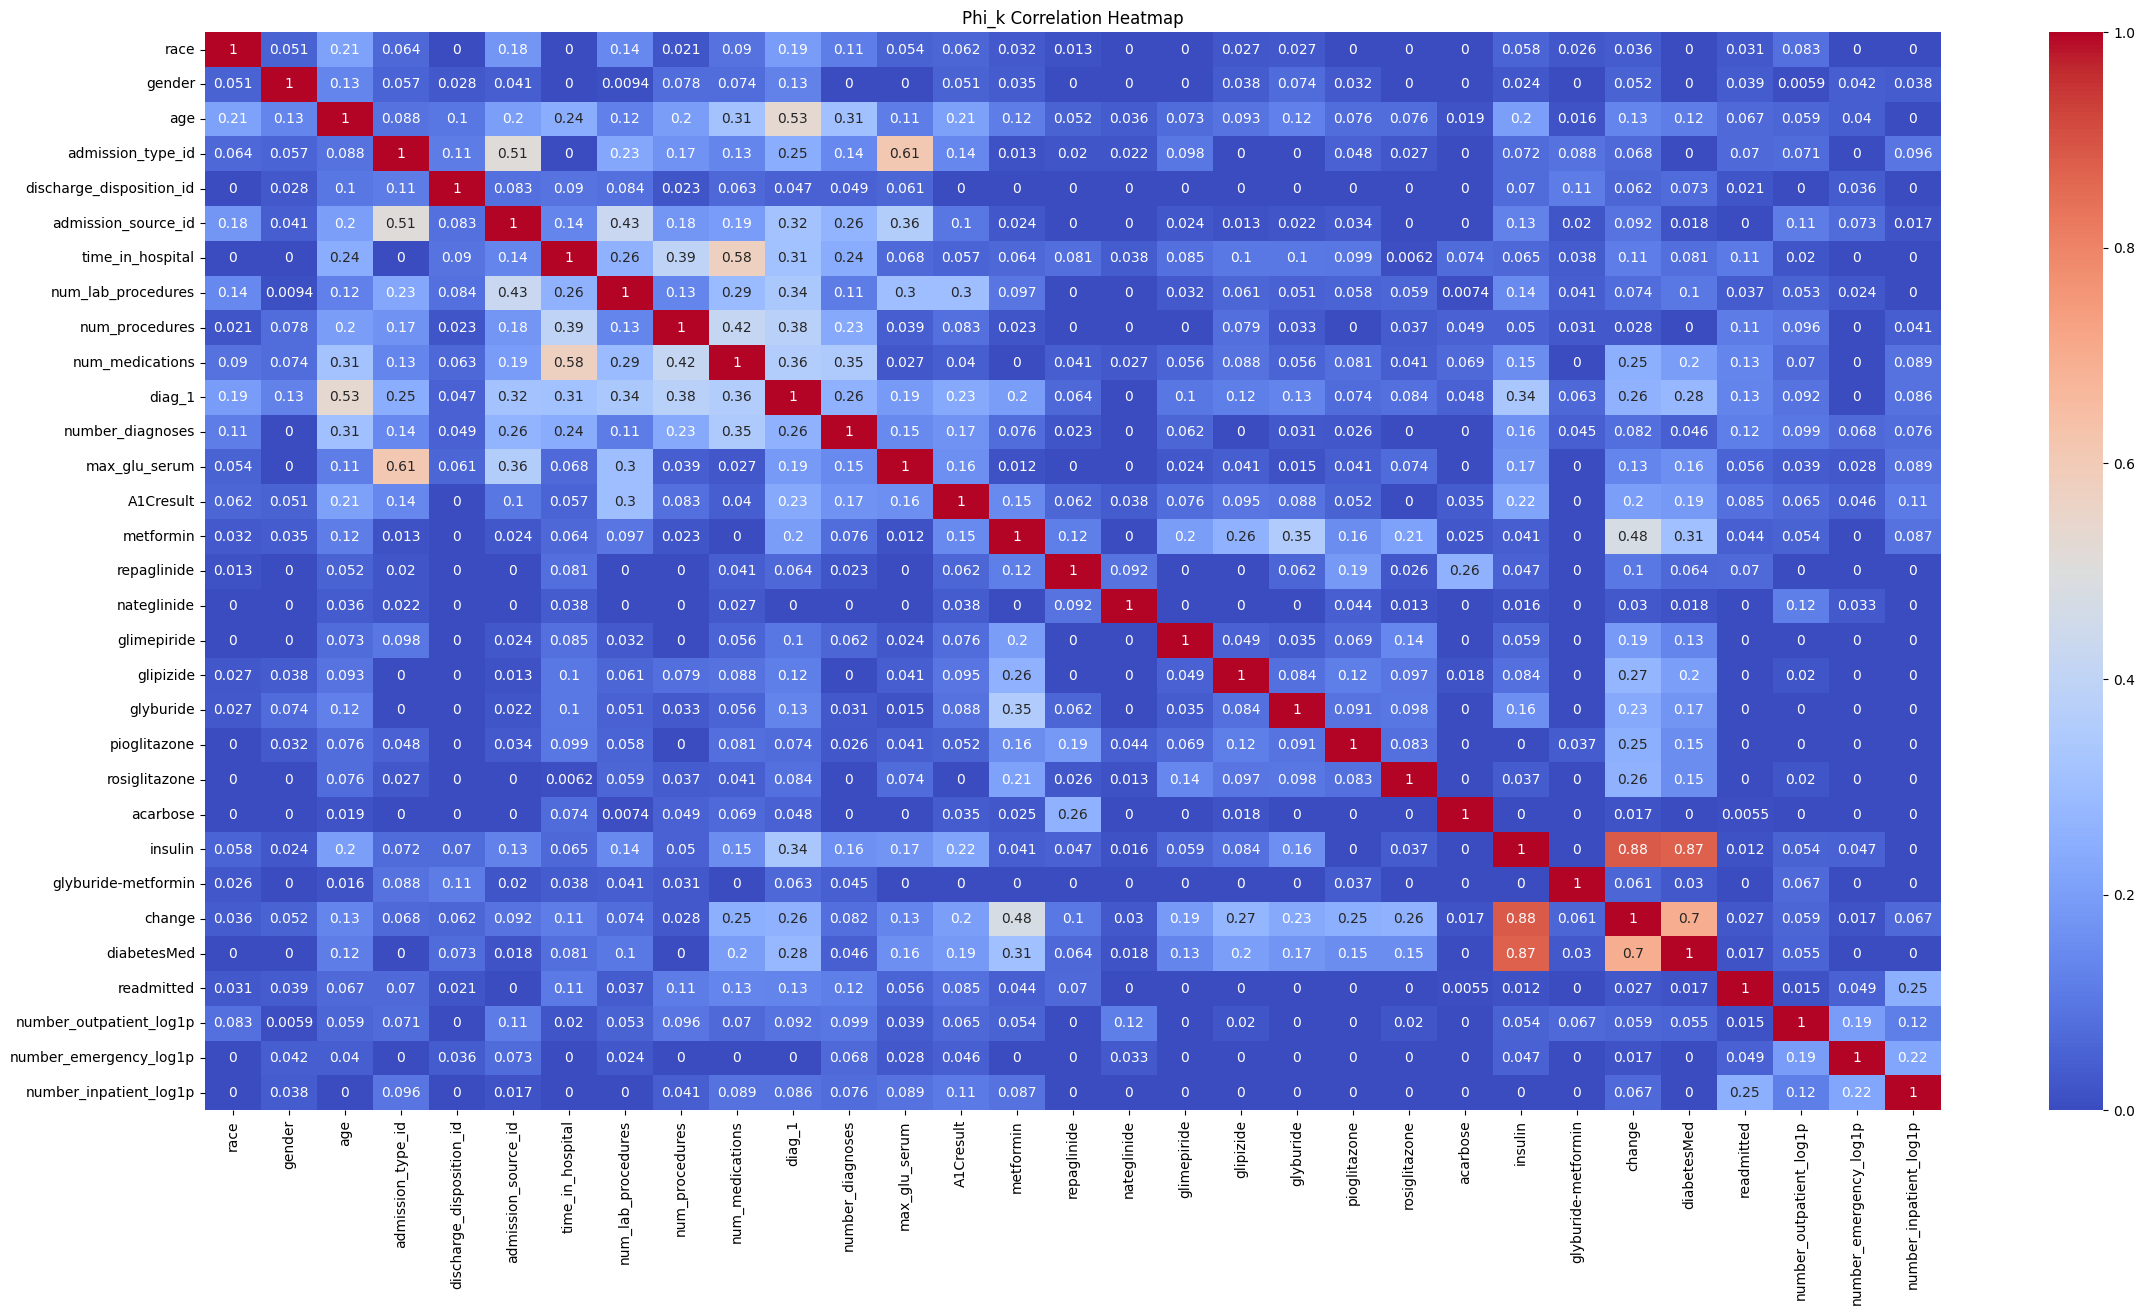

In [118]:
import pandas as pd
import phik
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have df loaded, now create a copy
df_copy = df.copy()

# Calculate Phi_k correlation
correlation_matrix = df_copy.phik_matrix()

# Create Heatmap
plt.figure(figsize=(28,14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Phi_k Correlation Heatmap")
plt.show()



In [42]:
# # Set correlation threshold
# threshold = 0.6

# # Iterate over the correlation matrix
# for i in range(correlation_matrix.shape[0]):
#     for j in range(i+1, correlation_matrix.shape[1]):
#         # If the correlation coefficient is above threshold and the two columns are not the same
#         if abs(correlation_matrix.iloc[i, j]) > threshold and i != j:
#             print(f"The columns '{correlation_matrix.columns[i]}' and '{correlation_matrix.columns[j]}' are highly correlated.")

NameError: name 'correlation_matrix' is not defined

In [43]:
import pandas as pd

# Assuming your dataframe is named df
df = df.drop(columns=['insulin'])
# 'num_med', 'patient_service_log1p',

# Alternatively, you can use the 'inplace' parameter to modify the original dataframe
# df.drop(columns=['admission_source_id', 'change', 'diabetesMed'], inplace=True)


interval columns not set, guessing: ['age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'diag_1', 'number_diagnoses', 'readmitted', 'number_outpatient_log1p', 'number_emergency_log1p', 'number_inpatient_log1p']


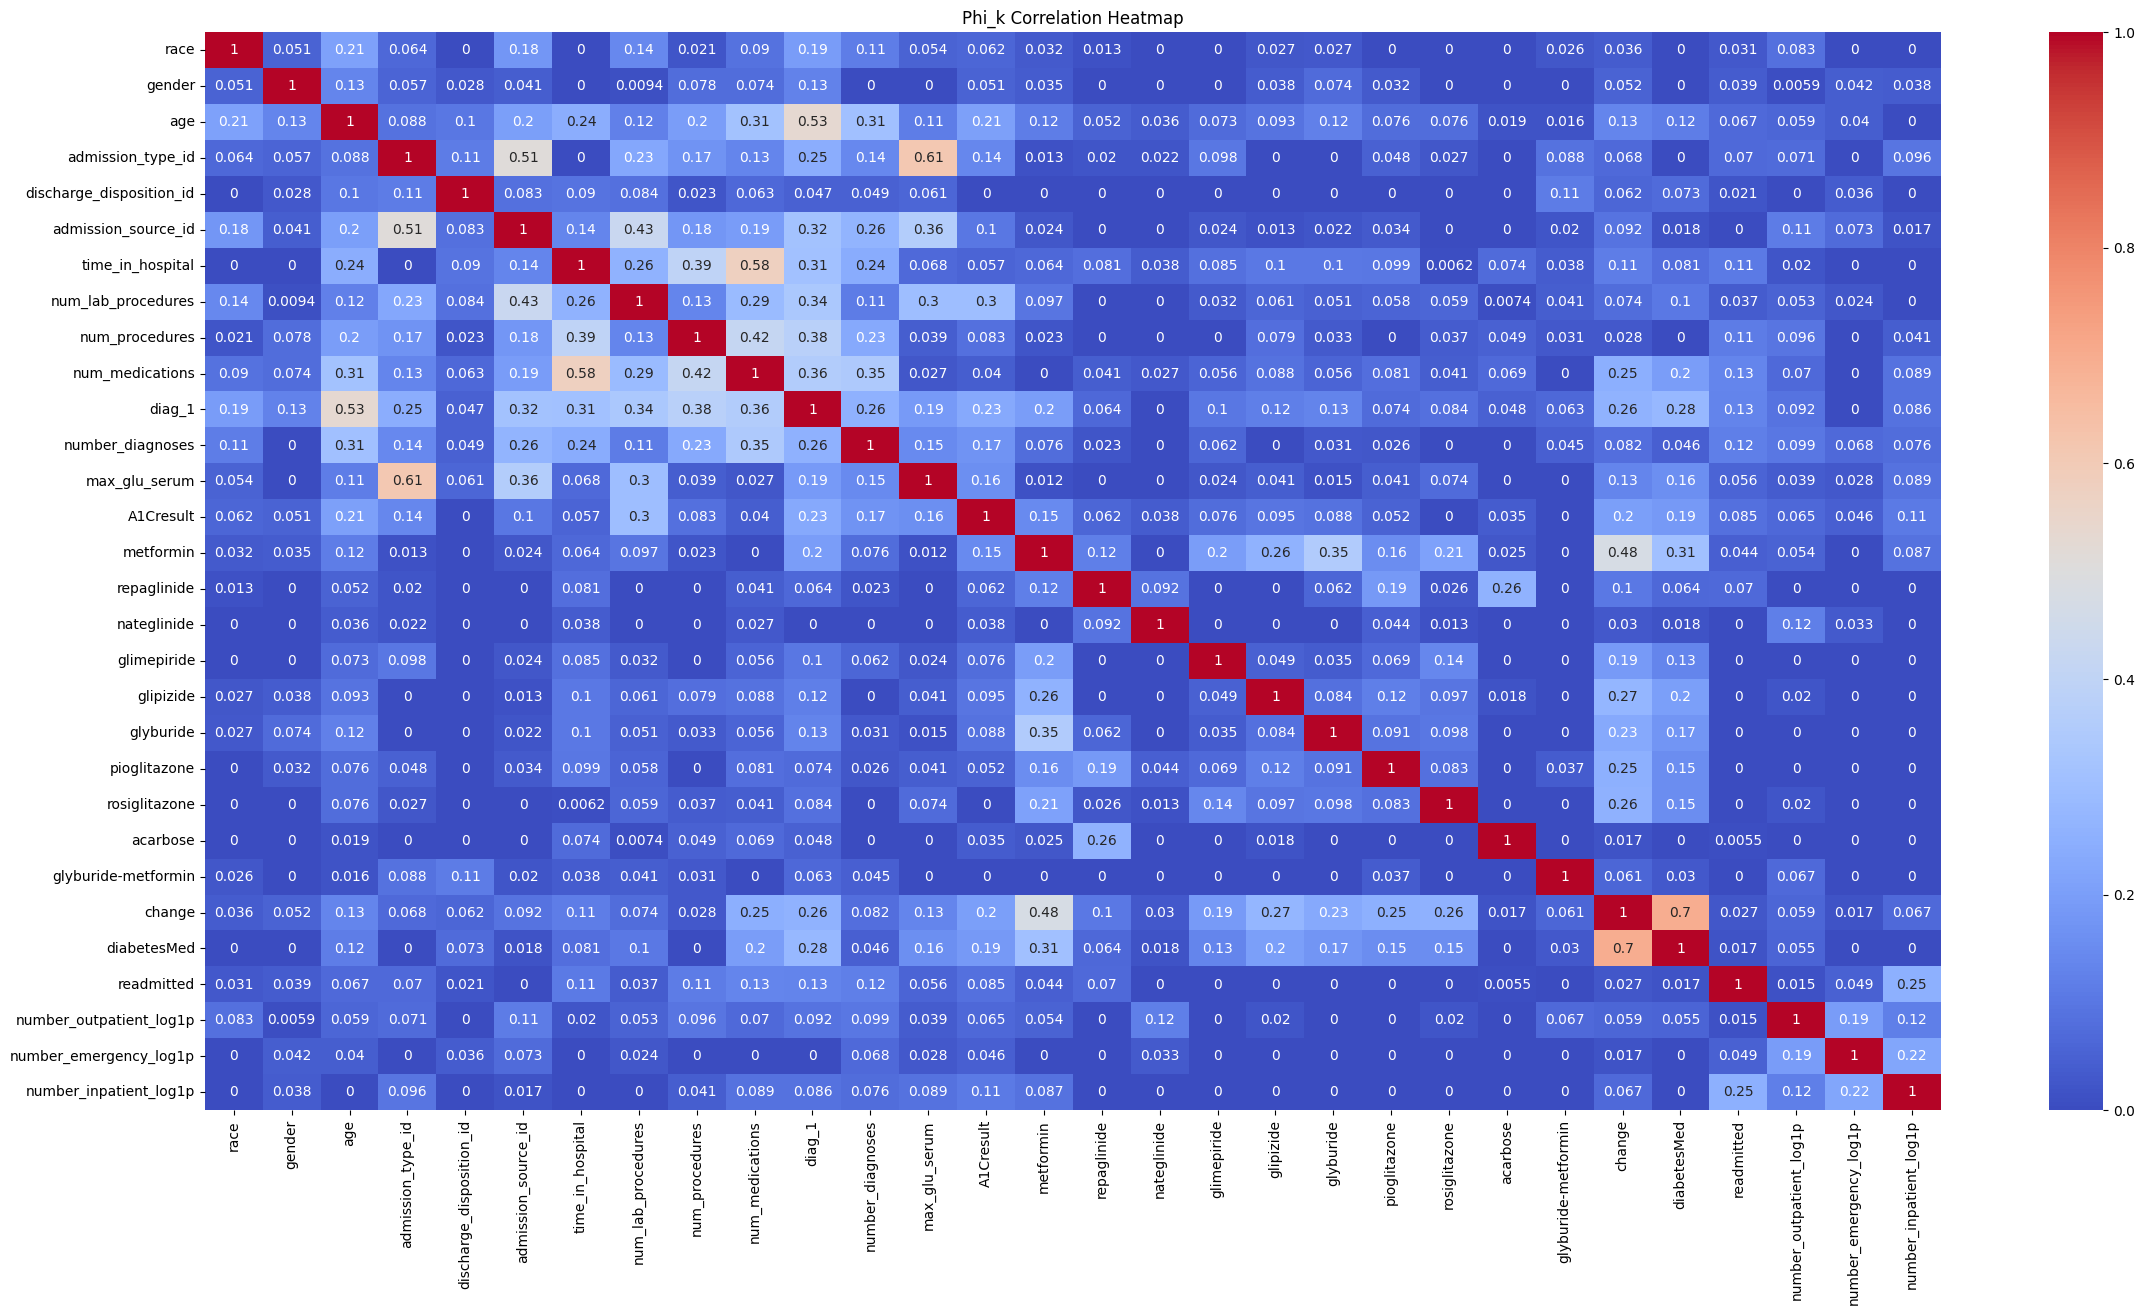

In [44]:
import pandas as pd
import phik
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have df loaded, now create a copy
df_copy = df.copy()

# Calculate Phi_k correlation
correlation_matrix = df_copy.phik_matrix()

# Create Heatmap
plt.figure(figsize=(28,14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Phi_k Correlation Heatmap")
plt.show()

The code is used to identify and remove outliers from a pandas DataFrame. An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In this case, the script is using the Interquartile Range (IQR) method to identify and remove these outliers

In [45]:
import pandas as pd

# Assuming df is your DataFrame

# Create a new DataFrame to hold non-outlier rows
df_no_outliers = correlation_matrix.copy()

for col in correlation_matrix.columns:
    if correlation_matrix[col].dtype in ['int64', 'float64']:  # apply only on numeric columns
        Q1 = correlation_matrix[col].quantile(0.25)
        Q3 = correlation_matrix[col].quantile(0.75)
        IQR = Q3 - Q1

        # Only keep rows in the DataFrame that do not contain outliers
        filter = (df_no_outliers[col] >= Q1 - 1.5 * IQR) & (df_no_outliers[col] <= Q3 + 1.5 * IQR)
        df_no_outliers = df_no_outliers.loc[filter]

print("Data Frame without outliers based on IQR method:")
print(df_no_outliers)


Data Frame without outliers based on IQR method:
Empty DataFrame
Columns: [race, gender, age, admission_type_id, discharge_disposition_id, admission_source_id, time_in_hospital, num_lab_procedures, num_procedures, num_medications, diag_1, number_diagnoses, max_glu_serum, A1Cresult, metformin, repaglinide, nateglinide, glimepiride, glipizide, glyburide, pioglitazone, rosiglitazone, acarbose, glyburide-metformin, change, diabetesMed, readmitted, number_outpatient_log1p, number_emergency_log1p, number_inpatient_log1p]
Index: []

[0 rows x 30 columns]


In [46]:
common_drugs = ['metformin', 'repaglinide', 'nateglinide', 'glimepiride', 'glipizide',
                'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'glyburide-metformin']


In [47]:
# Combine common and rare drugs lists
drugs = common_drugs

# Apply binary  for each drug
for drug in drugs:
    name = "take_" + drug
    df[name] = df[drug].isin(["Down", "Steady", "Up"]).astype(int)

# Remove the previous drug columns
df = df.drop(drugs, axis=1)

# Print the updated DataFrame
print(df)

                   race  gender  age  admission_type_id  \
10      AfricanAmerican  Female   45                  1   
52      AfricanAmerican  Female   45                  1   
56      AfricanAmerican  Female   55                  3   
60      AfricanAmerican  Female   75                  1   
89            Caucasian    Male   45                  3   
...                 ...     ...  ...                ...   
101693        Caucasian  Female   35                  1   
101703        Caucasian    Male   15                  1   
101713        Caucasian    Male   45                  1   
101731        Caucasian    Male   55                  1   
101753            Other    Male   45                  1   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
10                             1                    7                 9   
52                             1                    7                 8   
56                             1                    1             

# **Applying One-Hot Encoding to 'Race' and 'Gender' Columns in a DataFrame**

In [48]:
# Convert 'race' column into dummy/indicator variables
df = pd.get_dummies(df, columns = ["race"], prefix = "race", drop_first=True)
# Apply one-hot encoding to 'gender' column
df = pd.get_dummies(df, columns=['gender'], prefix = "gender", drop_first=True)
df

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,...,take_glyburide,take_pioglitazone,take_rosiglitazone,take_acarbose,take_glyburide-metformin,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male
10,45,1,1,7,9,47,2,17,250.70,9,...,0,0,0,0,0,0,0,0,0,0
52,45,1,1,7,8,55,2,17,250.60,9,...,0,0,0,0,0,0,0,0,0,0
56,55,3,1,1,9,37,2,19,250.70,4,...,0,0,0,0,0,0,0,0,0,0
60,75,1,1,7,4,48,2,15,250.40,9,...,0,0,0,0,0,0,0,0,0,0
89,45,3,1,1,4,38,1,17,250.70,9,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101693,35,1,1,7,2,67,0,9,250.13,9,...,0,0,0,0,0,0,1,0,0,0
101703,15,1,1,7,3,44,0,10,250.13,7,...,0,0,0,0,0,0,1,0,0,1
101713,45,1,1,7,3,62,0,14,250.10,8,...,0,0,0,0,0,0,1,0,0,1
101731,55,1,1,7,4,29,0,16,250.00,7,...,0,0,0,0,0,0,1,0,0,1


In [49]:
df

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,...,take_glyburide,take_pioglitazone,take_rosiglitazone,take_acarbose,take_glyburide-metformin,race_Asian,race_Caucasian,race_Hispanic,race_Other,gender_Male
10,45,1,1,7,9,47,2,17,250.70,9,...,0,0,0,0,0,0,0,0,0,0
52,45,1,1,7,8,55,2,17,250.60,9,...,0,0,0,0,0,0,0,0,0,0
56,55,3,1,1,9,37,2,19,250.70,4,...,0,0,0,0,0,0,0,0,0,0
60,75,1,1,7,4,48,2,15,250.40,9,...,0,0,0,0,0,0,0,0,0,0
89,45,3,1,1,4,38,1,17,250.70,9,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101693,35,1,1,7,2,67,0,9,250.13,9,...,0,0,0,0,0,0,1,0,0,0
101703,15,1,1,7,3,44,0,10,250.13,7,...,0,0,0,0,0,0,1,0,0,1
101713,45,1,1,7,3,62,0,14,250.10,8,...,0,0,0,0,0,0,1,0,0,1
101731,55,1,1,7,4,29,0,16,250.00,7,...,0,0,0,0,0,0,1,0,0,1


# **A1C and GluSerum tests apply One Hot Encoding**

In [50]:
df = pd.get_dummies(df, columns=['A1Cresult'], drop_first=False)
# Drop 'A1Cresult' and 'A1C_None' columns from DataFrame 'df'
df = df.drop(["A1Cresult_None"], axis = 1)




In [51]:

df = pd.get_dummies(df, columns=['max_glu_serum'], drop_first=False)
# Drop 'A1Cresult' and 'A1C_None' columns from DataFrame 'df'
df = df.drop(["max_glu_serum_None"], axis = 1)



In [52]:
df

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,...,race_Caucasian,race_Hispanic,race_Other,gender_Male,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_Norm
10,45,1,1,7,9,47,2,17,250.70,9,...,0,0,0,0,0,0,0,0,0,0
52,45,1,1,7,8,55,2,17,250.60,9,...,0,0,0,0,0,0,0,0,0,0
56,55,3,1,1,9,37,2,19,250.70,4,...,0,0,0,0,0,0,0,0,0,0
60,75,1,1,7,4,48,2,15,250.40,9,...,0,0,0,0,0,0,0,0,0,0
89,45,3,1,1,4,38,1,17,250.70,9,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101693,35,1,1,7,2,67,0,9,250.13,9,...,1,0,0,0,0,0,1,0,0,0
101703,15,1,1,7,3,44,0,10,250.13,7,...,1,0,0,1,0,1,0,0,0,0
101713,45,1,1,7,3,62,0,14,250.10,8,...,1,0,0,1,0,1,0,0,0,0
101731,55,1,1,7,4,29,0,16,250.00,7,...,1,0,0,1,0,0,0,0,0,0


# **Change and diabetesMed**

These two features simply need to converted:

for Change, from Ch to True and No to False for diabetesMed, from Yes to True and No to False.

In [53]:
# Update the 'change' column to boolean values
df.loc[df.change == "Ch", "change"] = True
df.loc[df.change == "No", "change"] = False
df['change'] = df['change'].astype(int)  # Convert boolean values to integers (0 or 1)

# Update the 'diabetesMed' column to boolean values
df.loc[df.diabetesMed == "Yes", "diabetesMed"] = True
df.loc[df.diabetesMed == "No", "diabetesMed"] = False
df['diabetesMed'] = df['diabetesMed'].astype(int)  # Convert boolean values to integers (0 or 1)

In [54]:
target_counts = df['readmitted'].value_counts()
print(target_counts)


0    4475
1     462
Name: readmitted, dtype: int64


In [56]:
df

,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,number_diagnoses,...,race_Caucasian,race_Hispanic,race_Other,gender_Male,A1Cresult_>7,A1Cresult_>8,A1Cresult_Norm,max_glu_serum_>200,max_glu_serum_>300,max_glu_serum_Norm
10,45,1,1,7,9,47,2,17,250.70,9,...,0,0,0,0,0,0,0,0,0,0
52,45,1,1,7,8,55,2,17,250.60,9,...,0,0,0,0,0,0,0,0,0,0
56,55,3,1,1,9,37,2,19,250.70,4,...,0,0,0,0,0,0,0,0,0,0
60,75,1,1,7,4,48,2,15,250.40,9,...,0,0,0,0,0,0,0,0,0,0
89,45,3,1,1,4,38,1,17,250.70,9,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101693,35,1,1,7,2,67,0,9,250.13,9,...,1,0,0,0,0,0,1,0,0,0
101703,15,1,1,7,3,44,0,10,250.13,7,...,1,0,0,1,0,1,0,0,0,0
101713,45,1,1,7,3,62,0,14,250.10,8,...,1,0,0,1,0,1,0,0,0,0
101731,55,1,1,7,4,29,0,16,250.00,7,...,1,0,0,1,0,0,0,0,0,0


# **Modeling**

**Apply Logistic Regression, Decision Tre, Random Forest, AdaBoost**

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming df is your dataframe and 'readmitted' is the column to be predicted
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Splitting the data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model

    metrics_val = {}
    metrics_test = {}

    for dataset_name, (X_set, y_set) in [("Val", (X_val, y_val)), ("Test", (X_test, y_test))]:
        # Predictions
        y_pred = model.predict(X_set)
        y_prob = model.predict_proba(X_set)[:, 1]

        # Metrics
        accuracy = accuracy_score(y_set, y_pred)
        precision = precision_score(y_set, y_pred)
        recall = recall_score(y_set, y_pred)
        f1 = f1_score(y_set, y_pred)
        auc_score = roc_auc_score(y_set, y_prob)

        if dataset_name == "Val":
            metrics_val = {
                f"Accuracy ({dataset_name})": accuracy,
                f"Precision ({dataset_name})": precision,
                f"Recall ({dataset_name})": recall,
                f"F1 ({dataset_name})": f1,
                f"AUC ({dataset_name})": auc_score
            }
        else:
            metrics_test = {
                f"Accuracy ({dataset_name})": accuracy,
                f"Precision ({dataset_name})": precision,
                f"Recall ({dataset_name})": recall,
                f"F1 ({dataset_name})": f1,
                f"AUC ({dataset_name})": auc_score
            }

    results.append({
        "Model": name,
        **metrics_val,
        **metrics_test
    })

# Create a dataframe from the results
results_df = pd.DataFrame(results)

# Display the dataframe
print(results_df)


c:\Users\faysa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  Accuracy (Val)  Precision (Val)  Recall (Val)  \
0  Logistic Regression        0.912955         1.000000      0.011494   
1        Decision Tree        0.828947         0.133929      0.172414   
2        Random Forest        0.910931         0.000000      0.000000   
3    Gradient Boosting        0.911943         0.500000      0.034483   
4             AdaBoost        0.910931         0.333333      0.011494   

   F1 (Val)  AUC (Val)  Accuracy (Test)  Precision (Test)  Recall (Test)  \
0  0.022727   0.658387         0.910931          1.000000       0.022222   
1  0.150754   0.532378         0.819838          0.133333       0.177778   
2  0.000000   0.672305         0.908907          0.000000       0.000000   
3  0.064516   0.669996         0.898785          0.142857       0.022222   
4  0.022222   0.668835         0.904858          0.166667       0.011111   

   F1 (Test)  AUC (Test)  
0   0.043478    0.674907  
1   0.152381    0.530982  
2   0.000000    0.68525

In [58]:
results_df

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 (Val),AUC (Val),Accuracy (Test),Precision (Test),Recall (Test),F1 (Test),AUC (Test)
0,Logistic Regression,0.912955,1.000000,0.011494,0.022727,0.658387,0.910931,1.000000,0.022222,0.043478,0.674907
1,Decision Tree,0.828947,0.133929,0.172414,0.150754,0.532378,0.819838,0.133333,0.177778,0.152381,0.530982
2,Random Forest,0.910931,0.000000,0.000000,0.000000,0.672305,0.908907,0.000000,0.000000,0.000000,0.685257
3,Gradient Boosting,0.911943,0.500000,0.034483,0.064516,0.669996,0.898785,0.142857,0.022222,0.038462,0.698917
4,AdaBoost,0.910931,0.333333,0.011494,0.022222,0.668835,0.904858,0.166667,0.011111,0.020833,0.683309


# **Apply Oversampling, Undersampling, SMOTE, ADASYN**

**Apply Logistic Regression, Decision Tre, Random Forest, AdaBoost**

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your dataframe and 'readmitted' is the column to be predicted
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Splitting the data into training, validation, and test sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

sampling_strategies = {
    "Oversampling": RandomOverSampler(),
    "Undersampling": RandomUnderSampler(),
    "SMOTE": SMOTE(),
    "ADASYN": ADASYN()
}

base_models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = []

for strategy_name, sampler in sampling_strategies.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    for model_name, model in base_models.items():
        model.fit(X_resampled, y_resampled)

        metrics_val = {}
        metrics_test = {}

        for dataset_name, (X_set, y_set) in [("Val", (X_val, y_val)), ("Test", (X_test, y_test))]:
            # Predictions
            y_pred = model.predict(X_set)
            y_prob = model.predict_proba(X_set)[:, 1]

            # Metrics
            accuracy = accuracy_score(y_set, y_pred)
            precision = precision_score(y_set, y_pred)
            recall = recall_score(y_set, y_pred)
            f1 = f1_score(y_set, y_pred)
            auc_score = roc_auc_score(y_set, y_prob)

            if dataset_name == "Val":
                metrics_val = {
                    f"Accuracy ({dataset_name})": accuracy,
                    f"Precision ({dataset_name})": precision,
                    f"Recall ({dataset_name})": recall,
                    f"F1 ({dataset_name})": f1,
                    f"AUC ({dataset_name})": auc_score
                }
            else:
                metrics_test = {
                    f"Accuracy ({dataset_name})": accuracy,
                    f"Precision ({dataset_name})": precision,
                    f"Recall ({dataset_name})": recall,
                    f"F1 ({dataset_name})": f1,
                    f"AUC ({dataset_name})": auc_score
                }

        results.append({
            "Model": f"{model_name} ({strategy_name})",
            **metrics_val,
            **metrics_test
        })

# Create a dataframe from the results
results_df = pd.DataFrame(results)

# Display the dataframe
print(results_df)

                                  Model  Accuracy (Val)  Precision (Val)  \
0    Logistic Regression (Oversampling)        0.692308         0.155556   
1          Decision Tree (Oversampling)        0.843117         0.113636   
2          Random Forest (Oversampling)        0.909919         0.250000   
3      Gradient Boosting (Oversampling)        0.724696         0.148289   
4               AdaBoost (Oversampling)        0.683198         0.153374   
5   Logistic Regression (Undersampling)        0.611336         0.136919   
6         Decision Tree (Undersampling)        0.521255         0.106122   
7         Random Forest (Undersampling)        0.616397         0.142157   
8     Gradient Boosting (Undersampling)        0.600202         0.135071   
9              AdaBoost (Undersampling)        0.632591         0.144330   
10          Logistic Regression (SMOTE)        0.676113         0.152239   
11                Decision Tree (SMOTE)        0.811741         0.133333   
12          

In [60]:
results_df

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 (Val),AUC (Val),Accuracy (Test),Precision (Test),Recall (Test),F1 (Test),AUC (Test)
0,Logistic Regression (Oversampling),0.692308,0.155556,0.563218,0.243781,0.653119,0.671053,0.153392,0.577778,0.242424,0.681824
1,Decision Tree (Oversampling),0.843117,0.113636,0.114943,0.114286,0.514186,0.849190,0.144578,0.133333,0.138728,0.527134
2,Random Forest (Oversampling),0.909919,0.250000,0.011494,0.021978,0.683742,0.904858,0.000000,0.000000,0.000000,0.673651
3,Gradient Boosting (Oversampling),0.724696,0.148289,0.448276,0.222857,0.627362,0.716599,0.176871,0.577778,0.270833,0.681774
4,AdaBoost (Oversampling),0.683198,0.153374,0.574713,0.242131,0.652851,0.655870,0.152778,0.611111,0.244444,0.690139
5,Logistic Regression (Undersampling),0.611336,0.136919,0.643678,0.225806,0.667853,0.584008,0.137698,0.677778,0.228893,0.657981
6,Decision Tree (Undersampling),0.521255,0.106122,0.597701,0.180243,0.555787,0.533401,0.104478,0.544444,0.175313,0.538369
7,Random Forest (Undersampling),0.616397,0.142157,0.666667,0.234343,0.678901,0.579960,0.139690,0.700000,0.232902,0.669995
8,Gradient Boosting (Undersampling),0.600202,0.135071,0.655172,0.223969,0.690835,0.565789,0.133909,0.688889,0.224231,0.658847
9,AdaBoost (Undersampling),0.632591,0.144330,0.643678,0.235789,0.664715,0.565789,0.132321,0.677778,0.221416,0.646034


# **Apply Model Tune using Oversampling, Undersampling, SMOTE, ADASYN**

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your dataframe and 'readmitted' is the column to be predicted
X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

sampling_strategies = {
    "Oversampling": RandomOverSampler(),
    "Undersampling": RandomUnderSampler(),
    "SMOTE": SMOTE(),
    "ADASYN": ADASYN()
}

base_models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

param_grid = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l2'],
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1]
    }
}

results = []

for strategy_name, sampler in sampling_strategies.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    for model_name, model in base_models.items():
        clf = GridSearchCV(model, param_grid[model_name], cv=3)
        clf.fit(X_resampled, y_resampled)

        best_model = clf.best_estimator_

        metrics_val = {}
        metrics_test = {}

        for dataset_name, (X_set, y_set) in [("Val", (X_val, y_val)), ("Test", (X_test, y_test))]:
            y_pred = best_model.predict(X_set)
            y_prob = best_model.predict_proba(X_set)[:, 1]

            accuracy = accuracy_score(y_set, y_pred)
            precision = precision_score(y_set, y_pred)
            recall = recall_score(y_set, y_pred)
            f1 = f1_score(y_set, y_pred)
            auc_score = roc_auc_score(y_set, y_prob)

            if dataset_name == "Val":
                metrics_val = {
                    f"Accuracy ({dataset_name})": accuracy,
                    f"Precision ({dataset_name})": precision,
                    f"Recall ({dataset_name})": recall,
                    f"F1 ({dataset_name})": f1,
                    f"AUC ({dataset_name})": auc_score
                }
            else:
                metrics_test = {
                    f"Accuracy ({dataset_name})": accuracy,
                    f"Precision ({dataset_name})": precision,
                    f"Recall ({dataset_name})": recall,
                    f"F1 ({dataset_name})": f1,
                    f"AUC ({dataset_name})": auc_score
                }

        results.append({
            "Model": f"{model_name} ({strategy_name})",
            **metrics_val,
            **metrics_test
        })

results_df = pd.DataFrame(results)
print(results_df)

                                  Model  Accuracy (Val)  Precision (Val)  \
0    Logistic Regression (Oversampling)        0.695344         0.157051   
1          Decision Tree (Oversampling)        0.853239         0.137500   
2          Random Forest (Oversampling)        0.911943         0.500000   
3      Gradient Boosting (Oversampling)        0.900810         0.260870   
4               AdaBoost (Oversampling)        0.677126         0.139752   
5   Logistic Regression (Undersampling)        0.656883         0.135838   
6         Decision Tree (Undersampling)        0.615385         0.117493   
7         Random Forest (Undersampling)        0.608300         0.134146   
8     Gradient Boosting (Undersampling)        0.579960         0.130631   
9              AdaBoost (Undersampling)        0.611336         0.133333   
10          Logistic Regression (SMOTE)        0.669028         0.147059   
11                Decision Tree (SMOTE)        0.856275         0.204301   
12          

In [62]:
results_df

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 (Val),AUC (Val),Accuracy (Test),Precision (Test),Recall (Test),F1 (Test),AUC (Test)
0,Logistic Regression (Oversampling),0.695344,0.157051,0.563218,0.245614,0.661258,0.665992,0.157143,0.611111,0.250000,0.671232
1,Decision Tree (Oversampling),0.853239,0.137500,0.126437,0.131737,0.524928,0.830972,0.111111,0.122222,0.116402,0.512113
2,Random Forest (Oversampling),0.911943,0.500000,0.011494,0.022472,0.675380,0.907895,0.333333,0.011111,0.021505,0.699053
3,Gradient Boosting (Oversampling),0.900810,0.260870,0.068966,0.109091,0.617807,0.889676,0.172414,0.055556,0.084034,0.643789
4,AdaBoost (Oversampling),0.677126,0.139752,0.517241,0.220049,0.628242,0.654858,0.140401,0.544444,0.223235,0.649901
5,Logistic Regression (Undersampling),0.656883,0.135838,0.540230,0.217090,0.673479,0.630567,0.144703,0.622222,0.234801,0.682764
6,Decision Tree (Undersampling),0.615385,0.117493,0.517241,0.191489,0.609884,0.591093,0.107500,0.477778,0.175510,0.580457
7,Random Forest (Undersampling),0.608300,0.134146,0.632184,0.221328,0.674104,0.579960,0.142857,0.722222,0.238532,0.697983
8,Gradient Boosting (Undersampling),0.579960,0.130631,0.666667,0.218456,0.641165,0.561741,0.121413,0.611111,0.202578,0.636414
9,AdaBoost (Undersampling),0.611336,0.133333,0.620690,0.219512,0.631508,0.569838,0.128603,0.644444,0.214418,0.643659


In [67]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

# Assuming df is your dataframe and 'readmitted' is the column to be predicted
# Replace this with your actual DataFrame
# df = YOUR_DATAFRAME_HERE
X = df.drop('readmitted', axis=1)
y = df['readmitted']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

sampling_strategies = {
    "Oversampling": RandomOverSampler(),
    "Undersampling": RandomUnderSampler(),
    "SMOTE": SMOTE(),
    "ADASYN": ADASYN()
}

base_models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

param_grid = {
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'penalty': ['l2'],
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1]
    }
}

results = []

for strategy_name, sampler in sampling_strategies.items():
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    
    for model_name, model in base_models.items():
        
        clf = GridSearchCV(model, param_grid[model_name], cv=3)
        clf.fit(X_resampled, y_resampled)
        best_model = clf.best_estimator_
        
        # Save the Random Forest model with Undersampling
        if model_name == "Random Forest" and strategy_name == "Undersampling":
            with open('RandomForest_Undersampling_model.pkl', 'wb') as file:
                pickle.dump(best_model, file)
                
        # Your performance evaluation code can go here.
